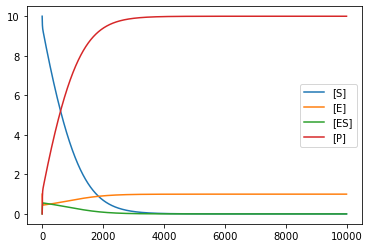

In [2]:
"""
Q2

OUYANG Hui
"""

import numpy as np
import matplotlib.pyplot as plt


"""
Function to be solved

s, e, es are concentration for S, E, ES
fs, fe, fes are function for the rate of changes of S, E, ES
k1, k2, k3 are rate constants
"""
k1 = 100
k2 = 600
k3 = 150

def fs(s, e, es):
    return -k1*s*e + k2*es

def fe(s, e, es):
    return -k1*s*e + k2*es + k3*es

def fes(s, e, es):
    return k1*s*e - k2*es - k3*es

def fp(s, e, es):
    return k3*es
    
"""
Initial condtion 
"""
S = [10]
E = [1]
ES = [0]
P = [0]

"""
Runge Kutta 4
"""
h = 0.01
N = 10000

for i in range(N):
    K1 = h * fs(S[-1], E[-1], ES[-1])
    L1 = h * fe(S[-1], E[-1], ES[-1])
    M1 = h * fes(S[-1], E[-1], ES[-1])
    
    K2 = h * fs(S[-1] + h*K1/2, E[-1] + h*L1/2, ES[-1] + h*M1/2)
    L2 = h * fe(S[-1] + h*K1/2, E[-1] + h*L1/2, ES[-1] + h*M1/2)
    M2 = h * fes(S[-1] + h*K1/2, E[-1] + h*L1/2, ES[-1] + h*M1/2)
    
    K3 = h * fs(S[-1] + h*K2/2, E[-1] + h*L2/2, ES[-1] + h*M2/2)
    L3 = h * fe(S[-1] + h*K2/2, E[-1] + h*L2/2, ES[-1] + h*M2/2)
    M3 = h * fes(S[-1] + h*K2/2, E[-1] + h*L2/2, ES[-1] + h*M2/2)
    
    K4 = h * fs(S[-1] + h*K3, E[-1] + h*L3, ES[-1] + h*M3)
    L4 = h * fe(S[-1] + h*K3, E[-1] + h*L3, ES[-1] + h*M3)
    M4 = h * fes(S[-1] + h*K3, E[-1] + h*L3, ES[-1] + h*M3)
    
    Sn = h/6* (K1 + 2*K2 + 2*K3 + K4)
    En = h/6* (L1 + 2*L2 + 2*L3 + L4)
    ESn = h/6* (M1 + 2*M2 + 2*M3 + M4)
    
    S.append(S[-1] + Sn)
    E.append(E[-1] + En)
    ES.append(ES[-1] + ESn)
    #Calculate the approximate value of P
    P.append(P[-1] + (ESn - Sn))
   
    
plt.plot(S)
plt.plot(E)
plt.plot(ES)
plt.plot(P)
plt.legend(["[S]","[E]","[ES]","[P]"])
plt.show()

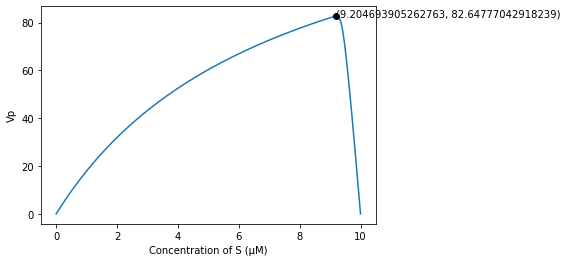

In [4]:
Vp = [k3*es for es in ES]
Vp_max = np.argmax(Vp)
plt.plot(S, Vp)
plt.plot(S[Vp_max], Vp[Vp_max],'ko')
plt.xlabel("Concentration of S (µM)")
plt.ylabel("Vp")
plt.annotate((S[Vp_max], Vp[Vp_max]), xy=(S[Vp_max], Vp[Vp_max]))
plt.show()